# Optimal learning rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from metamod.utils import ResultsManager
from metamod.utils import learning_rate_plot
plt.rcParams['text.usetex'] = True

## Semantic task 

In [2]:
results_path = "../results/large_cost_learning_rate/run_id_*_Semantic_*"
# results_path = "../results/corrected_learning_rate/run_id_*_MNIST_*"
path_list = glob.glob(results_path)

In [3]:
results = ResultsManager(path_list[1], verbose=True)

### Results from ../results/large_cost_learning_rate/run_id_4_Semantic_10-05-2023_00-21-06-133 ###
### Param Keys ###
--- dataset_params ---
batch_size, h_levels, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, in_cov_test, out_cov_test, in_out_cov_test, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_opt_lr, control_lr, in_cov, out_cov, in_out_cov, init_weights, in_cov_test, out_cov_test, in_out_cov_test, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'Loss_t_sim_t

In [4]:
cumulated_reward = results.results["cumulated_reward_opt"]
#plt.plot(cumulated_reward)
#plt.show()

In [5]:
optimal_learning_rate = results.results["control_signal"].detach().cpu().numpy()

In [6]:
# plt.plot(optimal_learning_rate)
# plt.axhline(y=0.0, c = "k")
# plt.show()

In [7]:
results_list = [ResultsManager(path_i, verbose=False) for path_i in path_list]

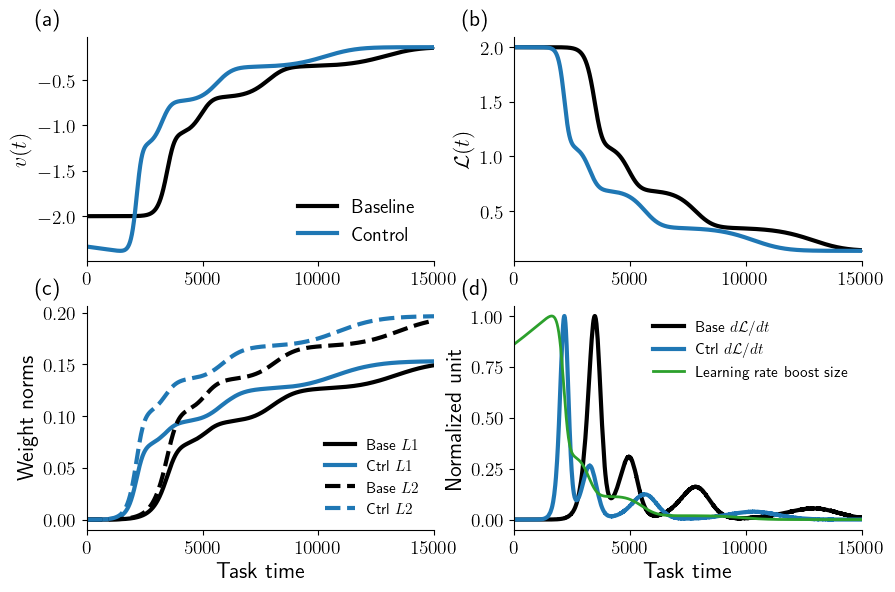

In [8]:
f, ax = plt.subplots(2, 2, figsize=(10, 8/5*4))
f.subplots_adjust(wspace=0.23)
ax = ax.flatten()
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
ax = learning_rate_plot(results_list, ax=ax, fontsize=16, line_width=3, x_lim=(0, 15000), skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels)

# MNIST training

In [9]:
results_path = "../results/corrected_learning_rate/run_id_*_MNIST_*"
path_list = glob.glob(results_path)

In [10]:
results_list = [ResultsManager(path_i, verbose=False) for path_i in path_list[:5]]

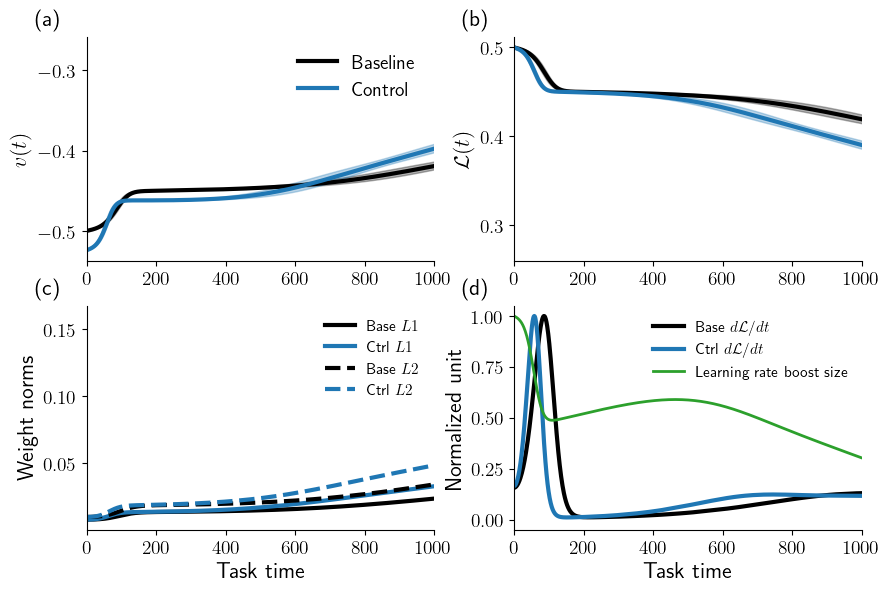

In [13]:
f, ax = plt.subplots(2, 2, figsize=(10, 8/5*4))
f.subplots_adjust(wspace=0.23)
ax = ax.flatten()
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
ax = learning_rate_plot(results_list, ax=ax, fontsize=16, line_width=3, x_lim=(0, 1000), skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels)

# MNIST eval on test

In [15]:
results_list = [ResultsManager(path_i, verbose=False) for path_i in path_list[5:]]

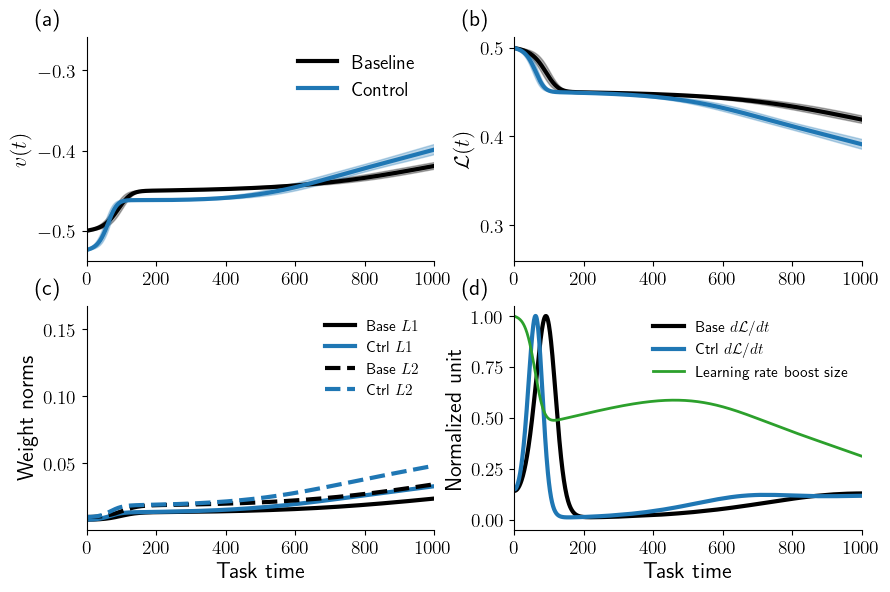

In [19]:
f, ax = plt.subplots(2, 2, figsize=(10, 8/5*4))
f.subplots_adjust(wspace=0.23)
ax = ax.flatten()
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
ax = learning_rate_plot(results_list, ax=ax, fontsize=16, line_width=3, x_lim=(0, 1000), skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels)

In [20]:
results_list[0].results["control_signal"], results_list[0].results["control_signal"].shape

(tensor([4.8957e-01, 4.8938e-01, 4.8918e-01,  ..., 2.7902e-07, 1.3950e-07,
         0.0000e+00], device='cuda:0'),
 torch.Size([30000]))